In [18]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi
%matplotlib inline

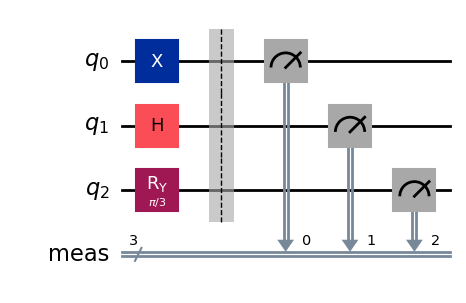

In [45]:
circuit = QuantumCircuit(3)

##### YOUR CODE GOES HERE #####
circuit.x(0)
circuit.h(1)
circuit.ry(pi/3, 2)

circuit.measure_all()
circuit.draw(output='mpl');

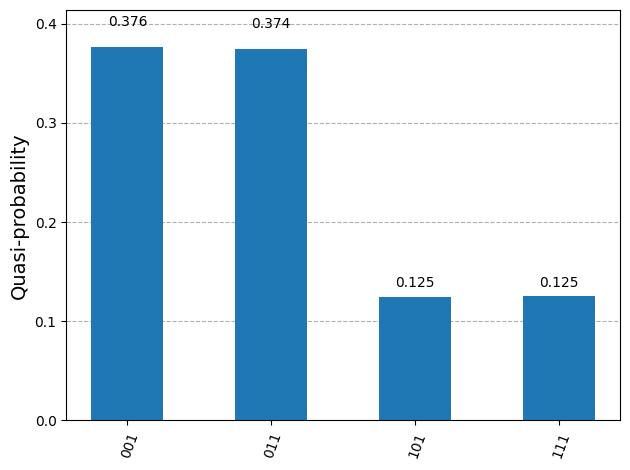

In [46]:
shots = 1_000_000
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=shots).result()
plot_histogram({k:v/shots for k, v in result.get_counts().items()});

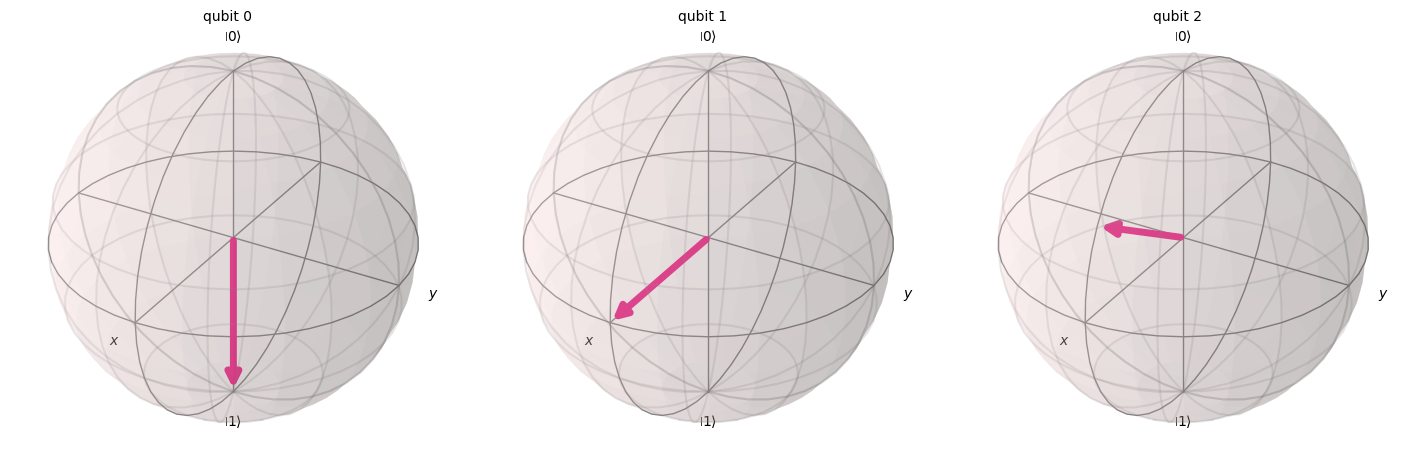

In [47]:
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
plot_bloch_multivector(statevector);

# Reasoning

The 0-indexed qubit is always 1, so we can simply apply an X gate.
The 1-indexed qubit has equal probability of ending up in 0 or 1 when adding up everything, so that corresponds to an H gate.
Finally, the distinguishing qubit is the 2-indexed qubit. This one corresponds to having a 75% chance of being 0 and a 25% of being 1. Taking the square root of this we get $\sqrt{0.75} = .87$ corresponds to a rotation of 60 degrees (or $\pi/3$ radians).